# PCA on Fashion-MNIST dataset

In [1]:

import numpy as np
import sklearn
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Fashion MNIST reader
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
x_train, y_train = load_mnist('data\\', kind='train')
x_test, y_test = load_mnist('data\\', kind='t10k')
print('Extraction completed!')

Extraction completed!


In [4]:
print("Data set contains %d samples with %d features" % x_train.shape)

Data set contains 60000 samples with 784 features


In [5]:
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

60000 training samples
10000 test samples


In [6]:
time_start = time.time()
pca_100 = PCA(n_components=100)
embedding_train = pca_100.fit_transform(x_train)
print('PCA with 100 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 100 principal components: {}'.format(np.sum(pca_100.explained_variance_ratio_)))

PCA with 100 components done! Time elapsed: 5.753600120544434 seconds
Cumulative variance explained by 100 principal components: 0.9118767141994865


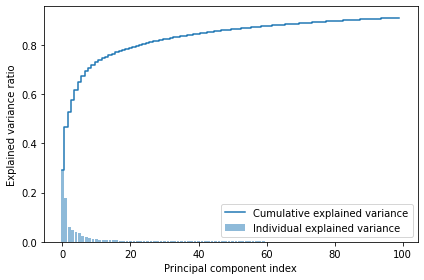

In [7]:
exp_var_pca = pca_100.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
time_start = time.time()
pca_50 = PCA(n_components=50)
embedding_train = pca_50.fit_transform(x_train)
print('PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 4.3906073570251465 seconds
Cumulative variance explained by 50 principal components: 0.862640461499721


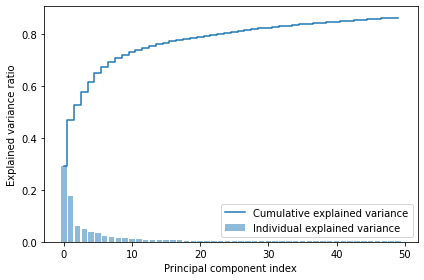

In [9]:
exp_var_pca = pca_50.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()